In [17]:
## Hello! This is the experiment selection optimization sandbox 1

First we have to build a function that interacts with an API so it can fetch thermophysical data for our mixture. We are going to use the following:


*   Methanol
*   Butanol
*   Acetone




In [18]:
# Package installation
!pip cache purge
!pip install pandas numpy matplotlib plotly math
!pip install thermo

Files removed: 6
ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math


In [19]:
# API Loading
#import thermo
import numpy as np
import random
import matplotlib.pyplot as plt
import math


In [20]:
# Costume Functions
def linspace_stepwise (start, end, step):
  return np.linspace(start, end, int((end - start) / step + 1))

def space_size (batch_size, increment, number_of_chemicals):
  return  math.comb(int(batch_size/increment)  + number_of_chemicals - 1, number_of_chemicals - 1)

In [21]:
# Sample Mixture Reading
import thermo

def mba_exp(mba_exp_input):
  methanol_mass = mba_exp_input[0]
  butanol_mass = mba_exp_input[1]
  acetone_mass = mba_exp_input[2]

  total_mass = methanol_mass + butanol_mass + acetone_mass

  methanol_massfraction = methanol_mass / total_mass
  butanol_massfraction = butanol_mass / total_mass
  acetone_massfraction = acetone_mass / total_mass

  m = thermo.Mixture(['methanol', 'butanol', 'acetone'], ws=[methanol_massfraction, butanol_massfraction, acetone_massfraction])

  density = m.rho
  viscosity = m.mu
  thermal_conductivity = m.k
  heat_capacity = m.Cp
  mba_exp_output = [density, viscosity, thermal_conductivity, heat_capacity]

  return mba_exp_output

def fom(y):
  #fom_array = [2.68, -0.42, 0.18, 1.08] #hannie recommendation
  fom_array = [0.78, -0.24, 0.65, 0.26] #constant power flow
  #fom_array = [0.3, -0.036, 0.736, 0.264]
  #fom_array = [0.2, -0.4, 0.2, 2]

  density_power = fom_array[0]
  viscosity_power = fom_array[1]
  thermal_conductivity_power = fom_array[2]
  heat_capacity_power = fom_array[3]

  per = (y[0]**density_power)*(y[1]**viscosity_power)*(y[2]**thermal_conductivity_power)*(y[3]**heat_capacity_power)
  return per

y_returns = ['density', 'viscosity', 'thermal conductivity', 'heat capacity']
y_units = ['[kg/m^3]', '[Pa*s]', '[W/m/K]', '[J/kg/K]']

In [22]:
# Alt Blackbox Generator

#np.random.seed(1)

hp = np.random.rand(6)


def bb1(X, hp):
  y = 0
  for i_bb1 in range(len(X)):
    y += 0.5*(1+np.sin(2*np.pi*((1-hp[2*i_bb1])*X[i_bb1]+hp[2*i_bb1+1])))+0.05*(np.random.rand(1)[0]-0.5)
  return y

In [27]:
# Brute Force
batch_mass = 1000
resolution = 1
num_dec = 1

x = []
x_1 = []
res_v = []

for i in range(0, int(batch_mass/resolution)+1):
  r = batch_mass - (i*resolution)
  for j in range(0, int(r/resolution)+1):
    runner = [i*resolution, j*resolution, (r-j)*resolution]
    #runner = [i*resolution/batch_mass, j*resolution/batch_mass, (r-j)*resolution/batch_mass]
    x.append(runner)
    x_1.append(sum(runner))
    res_v.append(fom(mba_exp(runner)))


Text(0, 0.5, 'FOM')

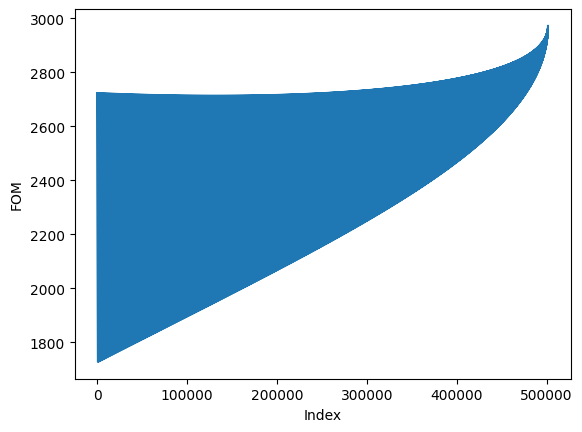

In [39]:
plt.plot(res_v)

plt.xlabel('Index')
plt.ylabel('FOM')

In [40]:
i = np.argmax(res_v)
print(x[i])

[1000, 0, 0]


In [ ]:
with open("res_v_small.npy", "wb") as f:
  np.save(f, res_v)

In [ ]:
with open("mass_batch_small.npy", "wb") as f:
  np.save(f, x)

In [ ]:
plt.plot([i[1] for i in x], res_v)
plt.xlabel('butanol mass')
plt.ylabel('FOM')

In [ ]:
plt.plot([i[0] for i in x], res_v)
plt.xlabel('methanol mass')
plt.ylabel('FOM')

In [ ]:
plt.plot([i[2] for i in x], res_v)
plt.xlabel('acetone mass')
plt.ylabel('FOM')

In [ ]:
res_v_dup, x_dup = np.load('res_v.npy'), np.load('mass_batch.npy')

In [ ]:
res_v_dup == res_v

In [ ]:
x_dup == x

In [ ]:
batch_mass = 1000
resolution = 1
num_dec = 1

x = []
x_1 = []
res_v = []

for i in range(0, int(batch_mass/resolution)+1):
  r = batch_mass - (i*resolution)
  for j in range(0, int(r/resolution)+1):
    runner = [i*resolution, j*resolution, r-j*resolution]
    x.append(runner)
    #x_1.append(sum(runner))
    #res_v.append(fom(mba_exp(runner)))

In [ ]:
plt.plot(x, linewidth=1, alpha=0.5)

# Function add a legend
plt.legend(['Methanol', 'Butanol', 'Acetone'])

plt.xlabel('Index')
plt.ylabel('Size')


# function to show the plot
plt.show()